In [1]:
# !pip install flask
# !pip install pytesseract
# !sudo apt install tesseract
from flask import Flask, request
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import cv2

(1200, 1920, 3)


True

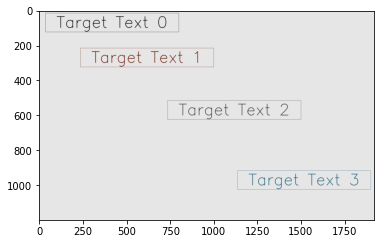

In [2]:
img_test = np.array(range(1920*1200)).reshape((1920,1200))
img_test = np.ones((1200,1920,3)) # h x w
img_test = np.zeros((1200,1920,3), np.uint8)
img_test.fill(230)
print(img_test.shape)
# img_test = img_test 

colors = [[0,0,0],
          [98,17,0],
          [60,50,60],
          [20,90,120]]

coords = [[100,100],  # 텍스트 왼쪽 하단좌표
          [300,300],
          [800,600],
          [1200,1000]]


for i in range(len(coords)):
    text = f'Target Text {i}'
    font = cv2.FONT_ITALIC
    font_scale = 3
    font_thickness = 2 
    cv2.putText(img_test,text, coords[i], font, font_scale, colors[i], font_thickness, cv2.LINE_AA)  # 이미지, 텍스트, 좌표, 폰트, 비율, 색상, 굵기, 선   // 
    (w , h) ,_ = cv2.getTextSize(text, font, font_scale, font_thickness) 
    box_LeftTop = (coords[i][0] - int(w*0.1), coords[i][1] - int(h*1.3))
    box_RightBottom = (coords[i][0] + int(w*1.1), coords[i][1] + int(h*0.4))
    cv2.rectangle(img_test, box_LeftTop , box_RightBottom, colors[i], 1)
#     cv2.rectangle(img_test, (0,0),(200,500),1) # w,h
    

plt.imshow(img_test)
cv2.imwrite('./img_test.jpg',img_test)

In [3]:
cv2.getTextSize(text, font, font_scale, font_thickness)

((638, 64), 28)

In [68]:
from datetime import datetime, timedelta,timezone

utc = datetime.utcnow()
timezone_kst = timezone(timedelta(hours=9))
kst = utc.astimezone(timezone_kst)
# datetime.strftime('YYMMDD')
# format_data = "%d/%m/%y %H:%M:%S.%f"
format_date = "%YY%MM%DD"
# Using strptime with datetime we will format
# string into datetime

print(utc.strftime('%Y%m%d%H%M%S.%f')[:-4])
print(kst.strftime('%Y%m%d%H%M%S.%f')[:-4])


20221010094650.99
20221010184650.99


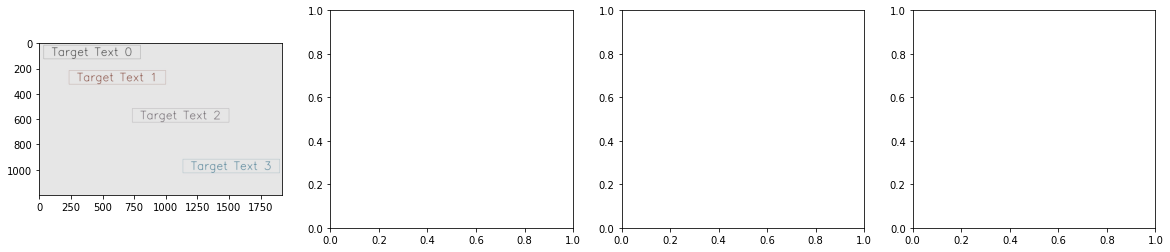

In [72]:
img_fp='./img_test.jpg'

img = cv2.imread(img_fp,cv2.COLOR_RGB2GRAY)
fig,ax = plt.subplots(1,4,figsize=(20,4))
ax[0].imshow(img)

In [78]:
import argparse

parser = argparse.ArgumentParser(description='API function')

parser.add_argument('--prj_nm', default='ocr')

# args = parser.parse_args() # vs code
args = parser.parse_args(args=[]) # jupyter notebook

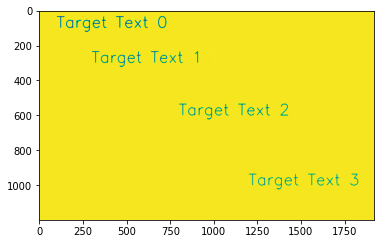

In [89]:
import os, cv2
import pytesseract
from PIL import Image
# from StringIO import StringIO
import pandas as pd
from pathlib import Path


class OCR:
    def __init__(self, img, args, size=512 ):

        self._img = img
        self._args = args
        self._size = size
        self._kernel_size = 5
        
    def process(self):
        
        # process id from timestamp
        utc = datetime.utcnow()
        timezone_kst = timezone(timedelta(hours=9))
        kst = utc.astimezone(timezone_kst)
        pid = kst.strftime('%Y%m%d%H%M%S.%f')[:-4]
        
        # 전송이미지 저장
        data_rt = Path('/code/data')
        prj_path = data_rt.joinpath(args.prj_nm)
        os.makedirs(prj_path,exist_ok=True)
        fnm = "{}.jpg".format(pid)
        fp = str(prj_path.joinpath(fnm))
        
        # image modification
        gray = cv2.cvtColor(self._img, cv2.COLOR_RGB2GRAY)
#         binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        img_edited = cv2.medianBlur(gray, ksize=self._kernel_size)
        plt.imshow(img_edited)
        cv2.imwrite(fp,img_edited)
        
        
        # pytesseract
        res_data = pytesseract.image_to_data(Image.open(fp),lang='eng',output_type='data.frame') # numpy array 읽지못하고 파일을 읽으므로, os로 파일을 불러야함 , # 숫자는 lang = None
        tmp_1 = res_data.dropna()
        tmp_2 = tmp_1[tmp_1.text!=' ']
        res = ' '.join(tmp_2.text)
        
        # threshold examples
#         ret, th1 = cv2.threshold(self._img,127,255,cv2.THRESH_BINARY)
        
        ## 영역별 임계처리 - adaptiveThreshold 는 grayscale이미지 input 필요
#         th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,2)
#         th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

#         res_img = binary
        # remove noise
        
#         plt.imshow(res_img,cmap='gray')
        
        
        # result string examples
#         custom_config = r'--oem 3 --psm 6' # OCR엔진 3번, 페이지분할모드 3번
#         res_txt = pytesseract.image_to_data(res_img,lang='eng',config=custom_config)
#         res_txt = pytesseract.image_to_string(res_img,lang='eng')    
#         res_str = pytesseract.image_to_string(Image.open(self._img_fp),lang='eng')
#         print(res_txt)
#         print(res_str.replace('\n',' ').replace('  ',' ').replace('  ',' '))
        
#         data = pd.read_csv(StringIO(res_data),sep=r'\s',lineterminator=r'\n')
#         print(data)

        return res
    
img = cv2.imread('./img_test.jpg')
img = img.astype("uint16")
plt.imshow(img)
ocr = OCR(img,args)
res_data = ocr.process()

In [52]:
tmp_1 = res_data.dropna()
tmp_2 = tmp_1[tmp_1.text!=' ']
' '.join(tmp_2.text)

'Target Text O Target Text 1 Target Text 2 Target Text J'

In [80]:
img.shape
fp

NameError: name 'fp' is not defined

In [90]:
tmp = 'test'
f"test {tmp}"

'test test'

In [4]:
import json
from collections import OrderedDict
import pprint

In [5]:
imgs = ['./img_test.jpg']

colors = [[[0,0,0],
          [98,17,0],
          [60,50,60],
          [20,90,120]]]

boxes = [[[100,100],  # 텍스트 왼쪽 하단좌표
          [300,300],
          [800,600],
          [1200,1000]]]

# obj = {
#     "images":[
#         "id":0,
#         "width":1920,
#         "height":1200,
#         "file_name":""
#     ],
#     "annotations":[]
# }

obj = {
    "images":[],
    "annotations":[]
}

for i in range(len(imgs)):
    # images
    obj['images'].append(
        {
            "id": i,
            "img_fp": imgs[i]
        }
    )
    print(obj)
    
    # 
    tmp = []
    for j in range(len(boxes[i])):
        tmp.append(boxes[i][j])
    print(boxes)
    obj['annotations'].append(
        {
            "id":i,
            "box": tmp
        }
    )

api_sample = json.dumps(obj,indent=2)
api_sample = json.dumps(obj)
print(api_sample)
        

{'images': [{'id': 0, 'img_fp': './img_test.jpg'}], 'annotations': []}
[[[100, 100], [300, 300], [800, 600], [1200, 1000]]]
{"images": [{"id": 0, "img_fp": "./img_test.jpg"}], "annotations": [{"id": 0, "box": [[100, 100], [300, 300], [800, 600], [1200, 1000]]}]}


In [11]:
!pip install fiftyone
!pip install pycocotools
!pip install torchvision
import fiftyone

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 23.3 MB 18.1 MB/s            
     |████████████████████████████████| 881.9 MB 14 kB/s              
  Attempting uninstall: torch
    Found existing installation: torch 1.10.2
    Uninstalling torch-1.10.2:
      Successfully uninstalled torch-1.10.2


In [6]:
dataset = fiftyone.zoo.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections", "segmentations"],
    classes=["person", "car"],
    max_samples=50,
)

# Visualize the dataset in the FiftyOne App
session = fiftyone.launch_app(dataset)

Found annotations at '/home/jovyan/fiftyone/coco-2017/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-50'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [9]:
import fiftyone.zoo as foz

ds_cifar10 = foz.load_zoo_dataset("cifar10")

# View the dataset in the App
# session.dataset = ds_cifar10
session.dataset = ds_cifar10
session = fo.launch_app(ds_cifar10,remote=True,port=8787)

ImportError: 

You tried to download a dataset from the FiftyOne Dataset Zoo using the PyTorch
backend, but you do not have the necessary packages installed.

Ensure that you have `torch` and `torchvision` installed on your machine, and
then try running this command again.

See https://voxel51.com/docs/fiftyone/user_guide/dataset_zoo/index.html
for more information about working with the Dataset Zoo.


If you think this error is inaccurate, you can set `fiftyone.config.requirement_error_level` to 1 (warning) or 2 (ignore).
See https://voxel51.com/docs/fiftyone/user_guide/config.html for details.

TypeError: strptime() argument 1 must be str, not datetime.datetime